# Text Classification for Active vs. Passive Voice Detection



Objective: To develop a text classification model that can effectively detect whether a given sentence is in the acitve or passive voice.

Table of Content:


1.   About the Dataset.
2.   Importing the Relevant Libraries
3.   Exploratory Data Analysis
4.   Text Preprocessing
5.   Vectorizing the Text Data
6.   Model Building
7.   Conclusion.









About the Dataset:
The given dataset contains unique set of labelled sentences.

### Import necessary libraries and load the dataset

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn import metrics


### Load the Dataset

Changed the original filename to Text.xlsx and load the dataset into csv.

In [142]:
df = pd.DataFrame(pd.read_excel('Text.xlsx'))

To check the first 5 rows in the dataset.

In [143]:
df.head()

,id,sentence,voice
0,1,The chef prepares the meal.,Active
1,2,The teacher explains the lesson clearly.,Active
2,3,The gardener waters the plants every morning.,Active
3,4,The kids play soccer in the park.,Active
4,5,The author wrote a thrilling novel.,Active


## Exploratory Data Analysis

1) To check the missing values.
2) Class Distribution.

In [144]:
df.isna().sum()

id          0
sentence    0
voice       0
dtype: int64

<Axes: >

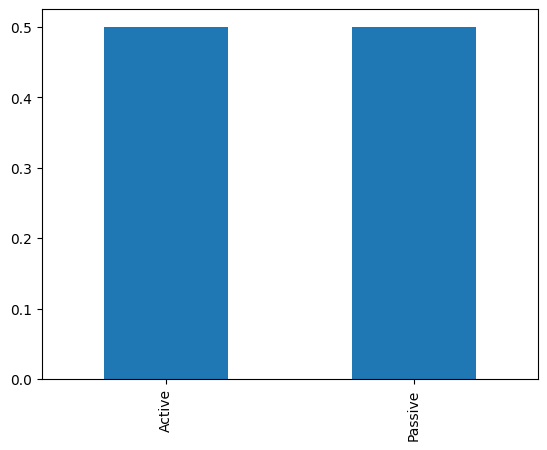

In [145]:
df['voice'].value_counts(normalize=True).plot.bar()

Observations: There are equal number of active and passive sentences in the given dataset which also states that the given dataset is balanced.

## Text Preprocessing

In Natural Language Processing, it is very important to perform the text preprocessing steps as it helps us to remove the special characters, lowercase all the words, tokenize, remove stopwords and lemmatize.

In [146]:
import nltk


In [147]:
#create a list txt
txt = list(df['sentence'])

In [148]:
#preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [149]:
corpus = []

for i in range(len(txt)):
  r = re.sub('[^a-zA-Z]', ' ', txt[i])
  r = r.lower()
  r = r.split()
  r = [word for word in r if word not in stopwords.words('english')]
  r = [lemmatizer.lemmatize(word) for word in r]
  r = ' '.join(r)

  corpus.append(r)

In [150]:
#assign corpus to df['sentence']
df['txt'] = corpus
df.head()

,id,sentence,voice,txt
0,1,The chef prepares the meal.,Active,chef prepares meal
1,2,The teacher explains the lesson clearly.,Active,teacher explains lesson clearly
2,3,The gardener waters the plants every morning.,Active,gardener water plant every morning
3,4,The kids play soccer in the park.,Active,kid play soccer park
4,5,The author wrote a thrilling novel.,Active,author wrote thrilling novel


#### let's split the dataset into Train, Test and Validation(60|20|20)

In [151]:
# Create feature and label sets

X = df['txt']
y = df['voice']


In [152]:
# train test split(60% train - 20% test - 20%validation)


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [153]:

# print the training and testing data

print('Training Data:',X_train.shape)
print('Testing Data:', X_test.shape)
print('Validation Data:',X_val.shape)

Training Data: (25,)
Testing Data: (8,)
Validation Data: (7,)


## Feature Extraction

Here, we use the Bag of Words model(CountVectorizer) to convert the cleaned text into numeric features. This is needed for training the machine leanring model.

In [154]:
# Train the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(25, 73)

## Model Training and evaluation





Let's train a Logistic regression model and evaluate its performance.


*   This code trains a logistic regression
model using the Logistic Regression class from the sklearn.linear_model module.
*   The fit method is used to fit the model to the training data **X_train_cv** and **y_train**


*   Then, the tranform method is used to transform the test **X_test** using previously fitted CountVectorizer cv.
*  Finally, the predict method is used to generate predictions for the tranformed test data **X_test_cv**



*   The predicted values are stored in predictions.



In [155]:
#Train the model
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# transform X_test using CV

X_test_cv = cv.transform(X_test)

#generate predictions
predictions= lr.predict(X_test_cv)
predictions

array(['Active', 'Active', 'Passive', 'Active', 'Active', 'Active',
       'Active', 'Active'], dtype=object)

In [156]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1-score",f1)

Accuracy: 0.125
Precision: 0.03571428571428571
Recall: 0.125
F1-score 0.05555555555555556


Classification report and Confusion Matrix

In [157]:
print(classification_report(y_test, predictions))
df =pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['Active','Passive'], columns=['Active','Passive'])
df

              precision    recall  f1-score   support

      Active       0.14      0.50      0.22         2
     Passive       0.00      0.00      0.00         6

    accuracy                           0.12         8
   macro avg       0.07      0.25      0.11         8
weighted avg       0.04      0.12      0.06         8



,Active,Passive
Active,1,1
Passive,6,0


Let's plot a confusion matrix.

*   The confusion_matrix function takes two arguments: y_test and predictions where y_test is the true labels of the test set and predictions are the predicted labels of the test set.

*   The DataFrame object is created with the confusion matrix as the data, and the index and column labels are set to['Active','Passive'].


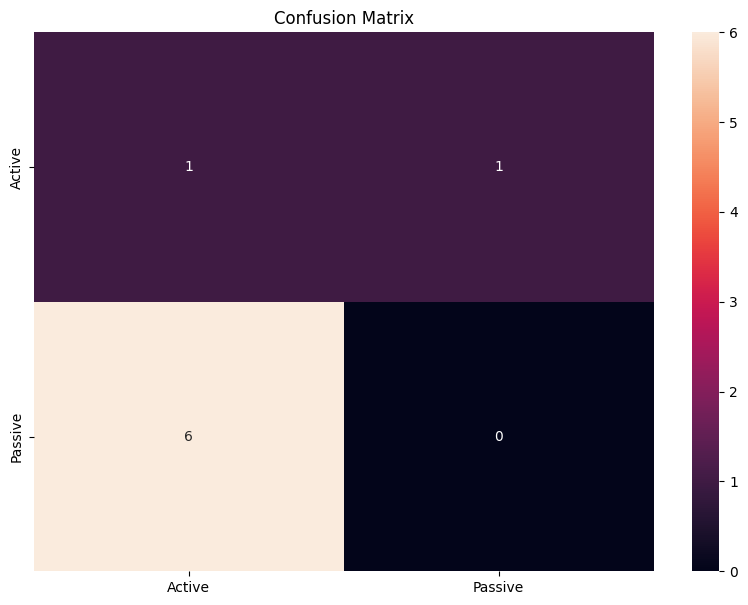

In [160]:
plt.figure(figsize=(10,7))
sns.heatmap(df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

**Conclusion**

*
I demonstrated the basics of NLP: text preprocessing and Bag-of-Words.

*   As the given dataset was a binary
classification, I used simple Logistic Regression model. But, we can further try different classifier models like naive bayes, SVM, xgBoost, Ensemble methods etc. for multilabel classification.
*   Evaluation metrics such as precision, recall, f1 score and model accuracy to understand how well our model works on unseen data.















**Thank You!**